In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(feature_train, label_train),(feature_test, label_test)= mnist.load_data()

print("train :",feature_train.shape,feature_train.shape)
print("test :",feature_test.shape,label_test.shape)

train : (60000, 28, 28) (60000, 28, 28)
test : (10000, 28, 28) (10000,)


In [3]:
## Normalisation => accelerer l'apprentissage

feature_train = tf.keras.utils.normalize(feature_train,axis=1)
feature_test = tf.keras.utils.normalize(feature_test,axis=1)

In [4]:
print(label_test)

[7 2 1 ... 4 5 6]


In [5]:
## quelque fonction pour l'affichage
def aff(feature_set,label_set,idx):
    print(label_set[idx])
    plt.imshow(feature_set[idx])

aff_train = lambda idx : aff(feature_train,label_train,idx)
aff_test  = lambda idx : aff(feature_test,label_test,idx)

4


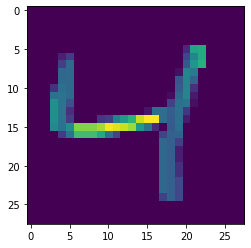

In [6]:
aff_train(2)
plt.show()

In [7]:
## Creation du model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation= tf.keras.activations.softmax))

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(feature_train,label_train,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/sample - loss: 1.3832 - accuracy: 0.7457
Epoch 2/20
60000/60000 [==============================] - 10s 169us/sample - loss: 0.7947 - accuracy: 0.8364
Epoch 3/20
60000/60000 [==============================] - 12s 196us/sample - loss: 0.6405 - accuracy: 0.8537
Epoch 4/20
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5663 - accuracy: 0.8637
Epoch 5/20
60000/60000 [==============================] - 11s 188us/sample - loss: 0.5213 - accuracy: 0.8707
Epoch 6/20
60000/60000 [==============================] - 11s 184us/sample - loss: 0.4905 - accuracy: 0.8760
Epoch 7/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4677 - accuracy: 0.8797
Epoch 8/20
60000/60000 [==============================] - 11s 177us/sample - loss: 0.4501 - accuracy: 0.8830
Epoch 9/20
60000/60000 [==============================] - 12s 193us/sample - loss: 0.4359 - accuracy: 0.8

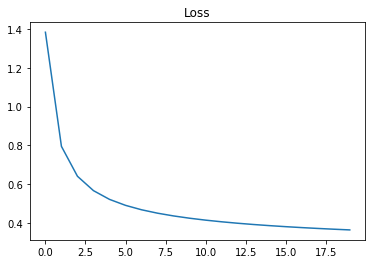

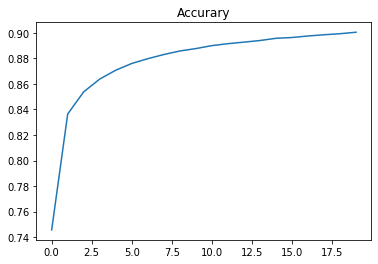

In [22]:
loss_curv = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curv)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accurary")
plt.show()

4
4


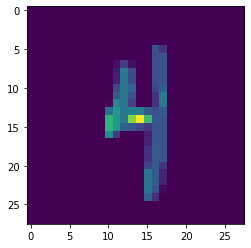

In [24]:
## petit test
i = 65
print('estimate number:', np.argmax(model.predict(feature_test[i:i+1])))
aff_test(i)

In [25]:
## performance
evaluate = model.evaluate(feature_train,label_train)
print(evaluate)

[0.3617210776925087, 0.9008333]


In [30]:
test_predic_proba = model.predict(feature_test)
print(test_predic_proba.shape)

(10000, 10)


In [31]:
test_predic_number = np.argmax(test_predic_proba,axis=1)

In [32]:
indice_err = np.where(test_predic_number != label_test)[0]
print(indice_err.shape)

(934,)


2
prediction: 0


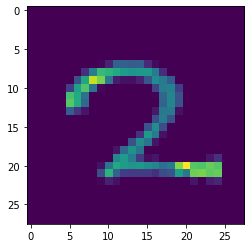

In [39]:
i = 3
aff_test(indice_err[i])
print("prediction:",test_predic_number[i])

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.save('MNIST_softmax_epochs20')

INFO:tensorflow:Assets written to: MNIST_softmax_epochs20/assets
